<a href="https://colab.research.google.com/github/alexandergribenchenko/datacamp/blob/main/AB_Testing_in_Python/NB_AB_Testing_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 01. Overview of A/B Testing

In [ ]:
import pandas as pd

In [ ]:
path_github_checkout = 'https://raw.githubusercontent.com/alexandergribenchenko/datacamp/main/AB_Testing_in_Python/checkout.csv'

In [ ]:
df_checkout = pd.read_csv(path_github_checkout, index_col=0)
df_checkout

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696
...,...,...,...,...,...,...,...
8995,903591,C,45.395883,1.0,M,safari,63.291767
8996,883490,C,30.462670,1.0,F,safari,33.425340
8997,914494,C,34.037979,1.0,M,chrome,40.575958
8998,897280,C,28.937421,1.0,F,chrome,30.374843


In [ ]:
df_checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9000 non-null   int64  
 1   checkout_page  9000 non-null   object 
 2   order_value    7605 non-null   float64
 3   purchased      9000 non-null   float64
 4   gender         9000 non-null   object 
 5   browser        9000 non-null   object 
 6   time_on_page   9000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 562.5+ KB


In [ ]:
df_checkout.purchased.value_counts(dropna=False)

1.0    7605
0.0    1395
Name: purchased, dtype: int64

In [ ]:
df_checkout.checkout_page.value_counts(dropna=False)

A    3000
B    3000
C    3000
Name: checkout_page, dtype: int64

In [ ]:
df_checkout.gender.value_counts(normalize=True)

F    0.507556
M    0.492444
Name: gender, dtype: float64

In [ ]:
sample_df = df_checkout.sample(n=3000)
sample_df['gender'].value_counts(normalize=True)

F    0.514667
M    0.485333
Name: gender, dtype: float64

In [ ]:
df_checkout.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  purchased
A              1.0          0.820333
               0.0          0.179667
B              1.0          0.847000
               0.0          0.153000
C              1.0          0.867667
               0.0          0.132333
Name: purchased, dtype: float64

In [ ]:
df_checkout.groupby('checkout_page')['purchased'].value_counts(normalize=True)

checkout_page  purchased
A              1.0          0.820333
               0.0          0.179667
B              1.0          0.847000
               0.0          0.153000
C              1.0          0.867667
               0.0          0.132333
Name: purchased, dtype: float64

In [ ]:
path_github_admissions = 'https://raw.githubusercontent.com/alexandergribenchenko/datacamp/main/AB_Testing_in_Python/admissions.csv'

In [ ]:
df_admissions = pd.read_csv(path_github_admissions)
df_admissions

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


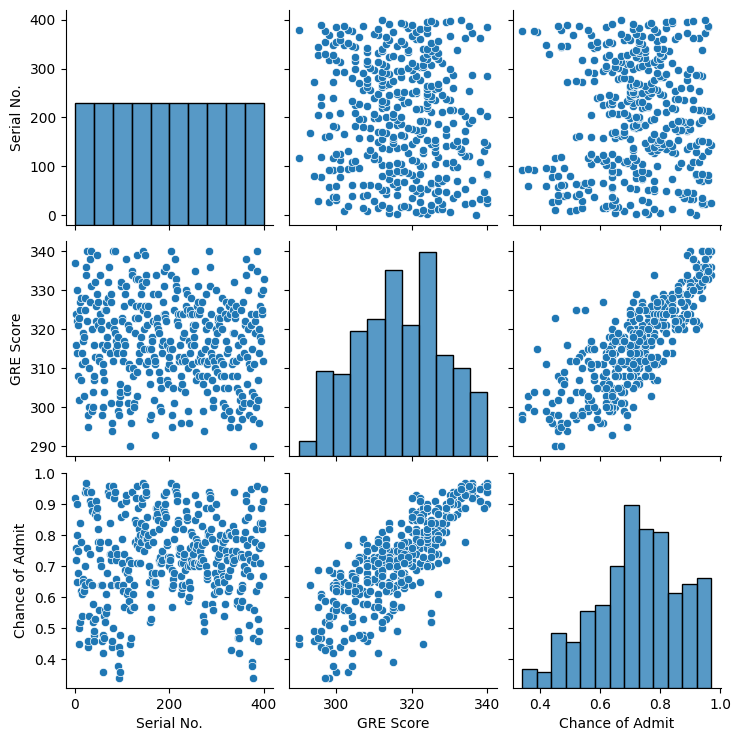

In [ ]:
import seaborn as sns
# Create pairplots
sns.pairplot(df_admissions[['Serial No.',\
'GRE Score', 'Chance of Admit']])

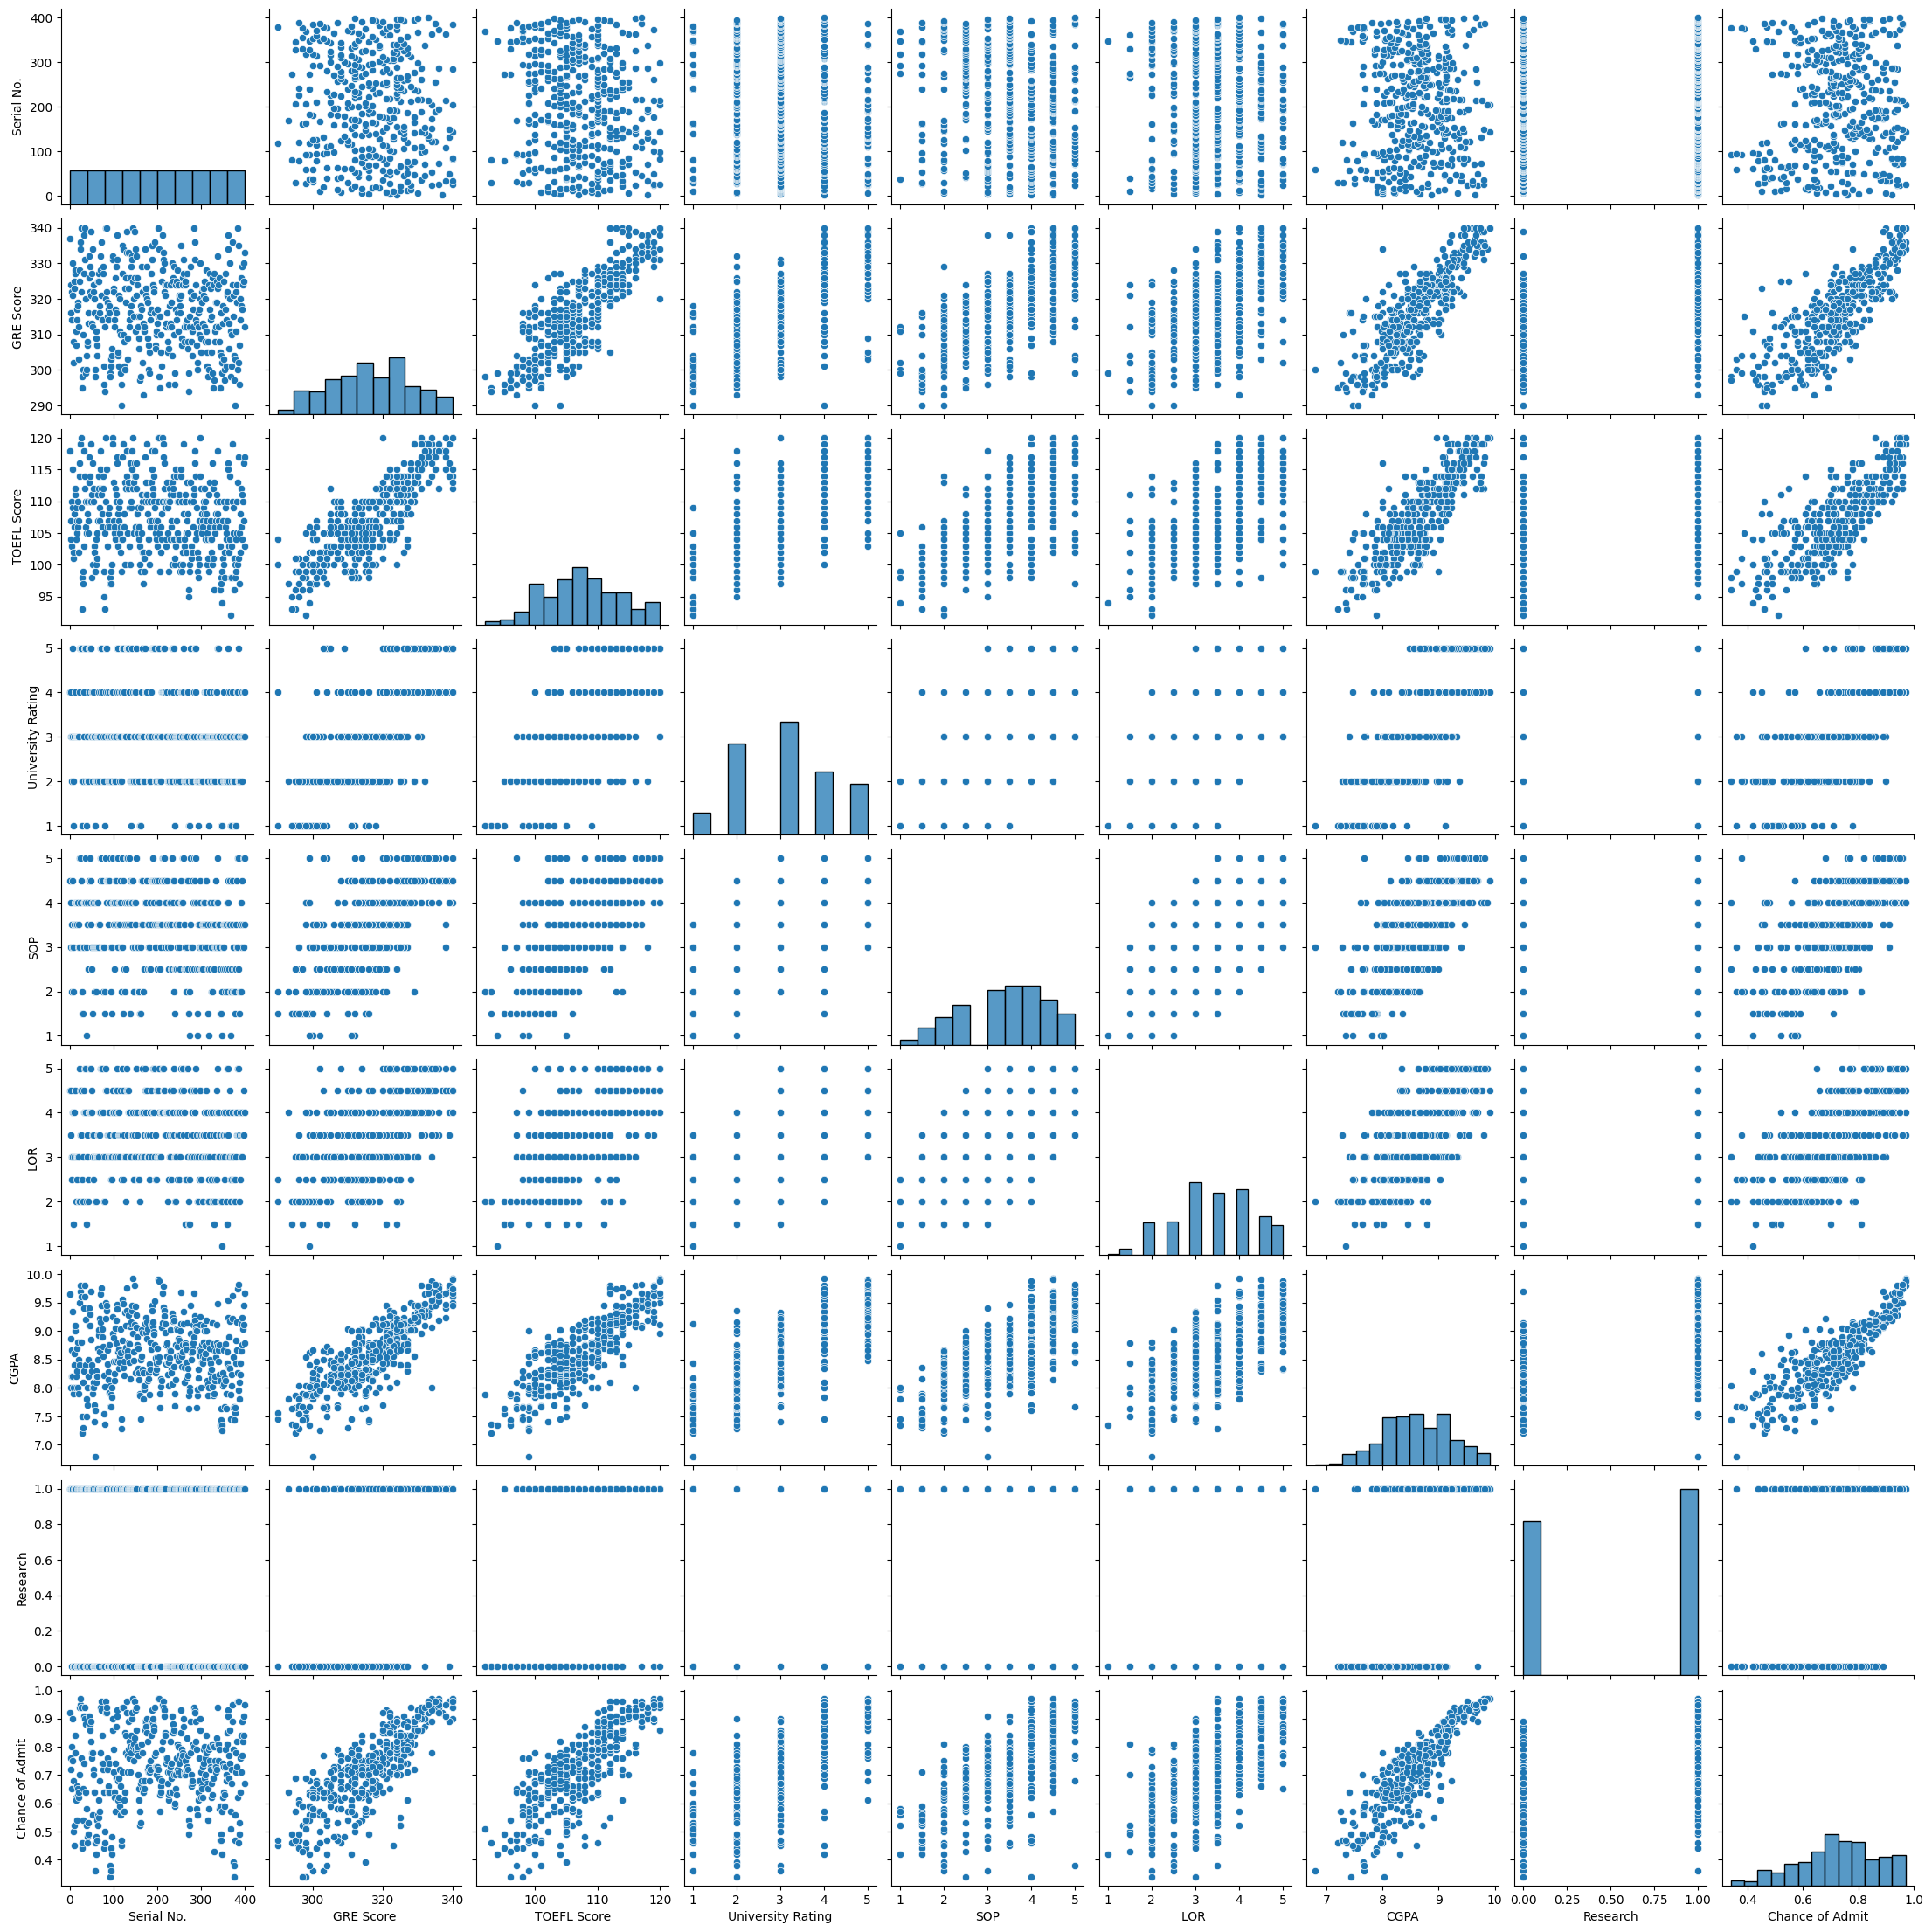

In [ ]:
sns.pairplot(df_admissions)

In [ ]:
# Print Pearson correlation coefficient
print(df_admissions['GRE Score']\
.corr(df_admissions['Chance of Admit']))

0.80261045959035


In [ ]:
df_admissions.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
# Print Pearson correlation coefficient
print(df_admissions['GRE Score']\
.corr(df_admissions['University Rating']))

0.6689758544451464


In [ ]:
# Print Pearson correlation coefficient
print(df_admissions['GRE Score']\
.corr(df_admissions['Chance of Admit']))

In [ ]:
print(df_admissions[['Serial No.', 'TOEFL Score', 'SOP','Chance of Admit']].corr())

                 Serial No.  TOEFL Score       SOP  Chance of Admit
Serial No.         1.000000    -0.147932 -0.166932         0.042336
TOEFL Score       -0.147932     1.000000  0.657981         0.791594
SOP               -0.166932     0.657981  1.000000         0.675732
Chance of Admit    0.042336     0.791594  0.675732         1.000000


In [ ]:
print(df_admissions.corr())

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138         0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391         0.802610  
TOEFL Sc

<Axes: >

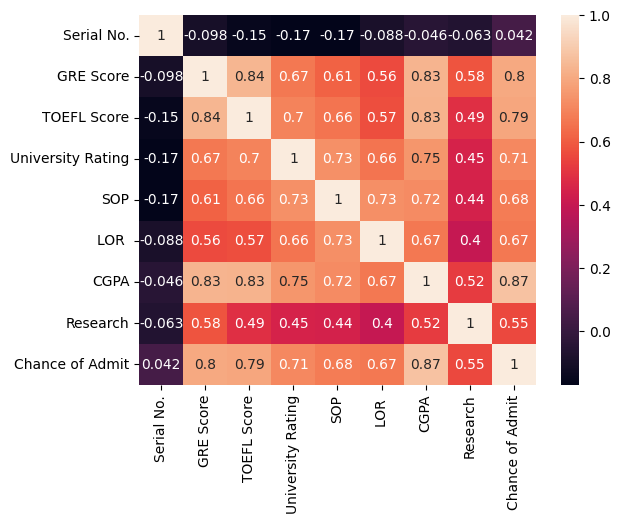

In [ ]:
# Plot correlations heatmap
sns.heatmap(df_admissions.corr(),annot=True)

<Axes: >

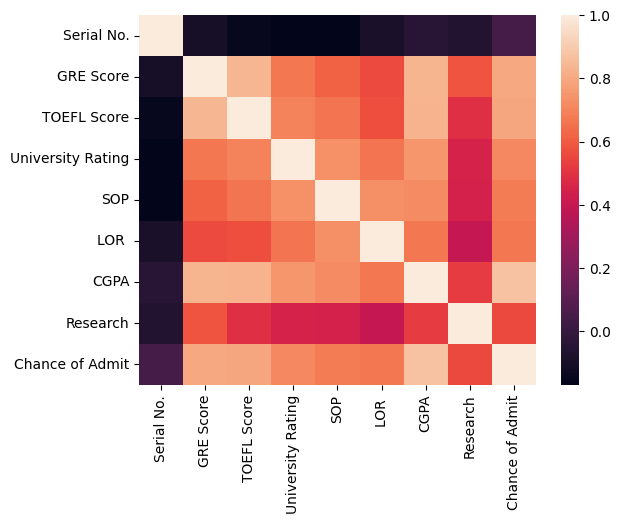

In [ ]:
# Plot correlations heatmap
sns.heatmap(df_admissions.corr(),annot=False)